#**FAKE JOB POST ANALYSIS**

>Task:

The given database contains a collection of job postings, some of which are fraudulent. The data contains textual & meta info about these jobs. Study the details of the dataset and find out which industry has the highest number of fake job postings.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
filename = "/content/fake_job_postings.csv"
data = pd.read_csv(filename,error_bad_lines=False, engine="python")
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [3]:
data.shape

(17880, 18)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [5]:
# Identify the nullity of the dataframe

missing_values = data.isnull().sum()
print('Total Missing Values:\n', missing_values)

Total Missing Values:
 job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64


##Data Cleaning

####Dealing with missing data
>Workflow for treating missing values

Convert all missing values to null values

1.   Analyze the amount and type of missingness in the data
2.   Appropriately delete or impute missing values
3.   Evaluate & compare the performance of the treated/imputed dataset


In [6]:
# Identify the percentage of nullity in the dataframe for each collumn

missing_values_perc = data.isnull().mean() * 100
miss_data = missing_values_perc.astype('int64')


print(f'Percentage of Missing Values:{miss_data}\n')

Percentage of Missing Values:job_id                  0
title                   0
location                1
department             64
salary_range           83
company_profile        18
description             0
requirements           15
benefits               40
telecommuting           0
has_company_logo        0
has_questions           0
employment_type        19
required_experience    39
required_education     45
industry               27
function               36
fraudulent              0
dtype: int64



Observation: For all the data columns with >50% missing values, imputing would most probably fill the datas with wrong values, hence I will dop them.
Benefits and required education has < than 50% of missing values. But considering that they are categorical features, filling them might also give us wrong values. Hence, I will drop all missing rows as well

In [7]:
#Drop Department and Salary_range

#new_data = data.drop(['department', 'salary_range', 'benefits'], axis=1)


#P.S I didnt drop since I will be filling them with null

In [8]:
#Fill remaining missing data with null
ddata = data.fillna("Null")

ddata.isnull().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

###EXPLORATORY DATA ANALYSIS

In [9]:
ddata.shape

(17880, 18)

In [10]:
#Check unique values in each column

for column in ddata:
  print(f"Unique character(s) in {column}  is:", len(ddata[column].unique()))

Unique character(s) in job_id  is: 17880
Unique character(s) in title  is: 11231
Unique character(s) in location  is: 3106
Unique character(s) in department  is: 1338
Unique character(s) in salary_range  is: 875
Unique character(s) in company_profile  is: 1710
Unique character(s) in description  is: 14802
Unique character(s) in requirements  is: 11969
Unique character(s) in benefits  is: 6206
Unique character(s) in telecommuting  is: 2
Unique character(s) in has_company_logo  is: 2
Unique character(s) in has_questions  is: 2
Unique character(s) in employment_type  is: 6
Unique character(s) in required_experience  is: 8
Unique character(s) in required_education  is: 14
Unique character(s) in industry  is: 132
Unique character(s) in function  is: 38
Unique character(s) in fraudulent  is: 2


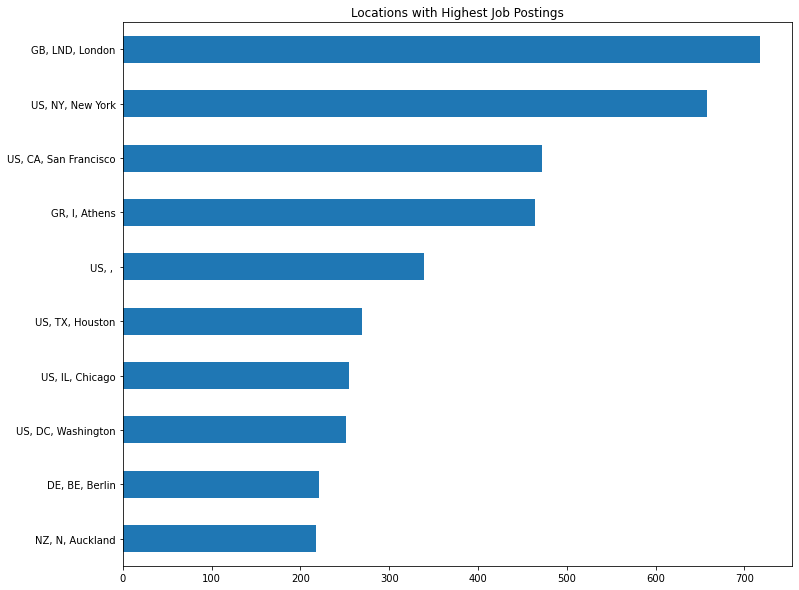

In [11]:
#Job Location

location_data = ddata[ddata['location'] != 'Null']

location_data['location'].value_counts().head(10).sort_values() \
                                  .plot(kind='barh', title='Locations with Highest Job Postings', figsize=(12,10))

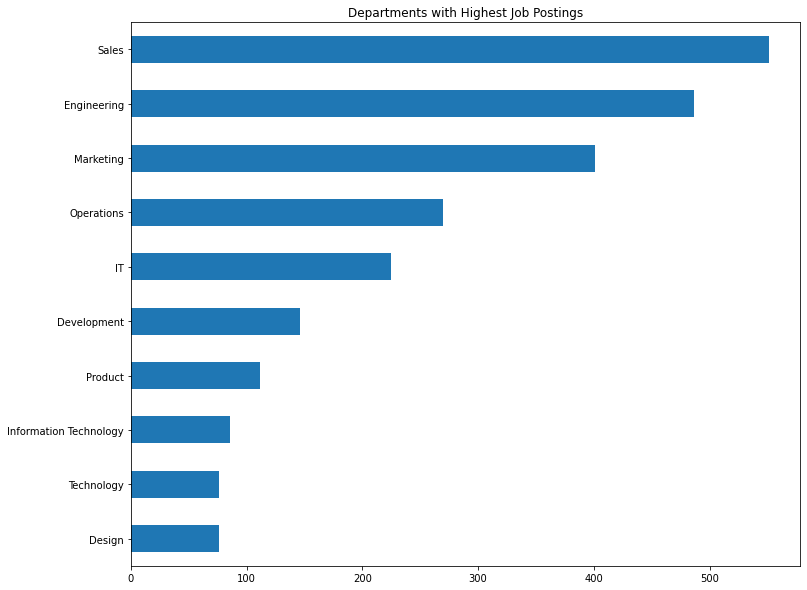

In [12]:
dep_plot = ddata[ddata['department'] != 'Null']

dep_plot['department'].value_counts().head(10).sort_values() \
                                  .plot(kind='barh', title='Departments with Highest Job Postings', figsize=(12,10))

In [13]:
#Telecommuting

ddata['telecommuting'].value_counts() 

0    17113
1      767
Name: telecommuting, dtype: int64

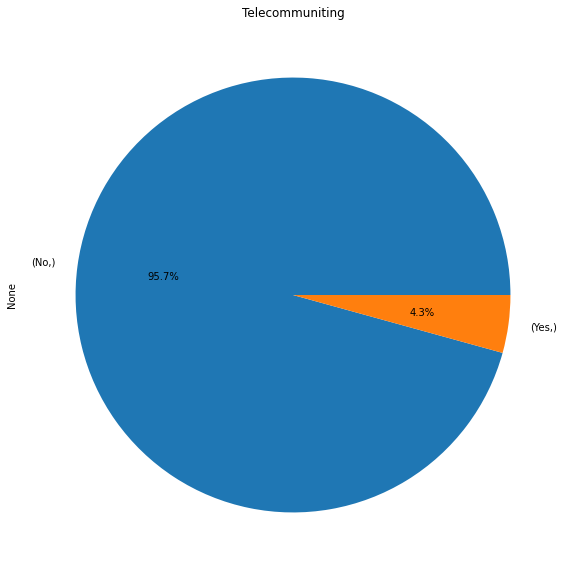

In [14]:
ddata['telecommuting'] = np.where(ddata['telecommuting']== 0, 'No', 'Yes')

ddata[['telecommuting']].value_counts().plot.pie(y='telecommuting', title='Telecommuniting', figsize=(12,10), autopct='%1.1f%%') 

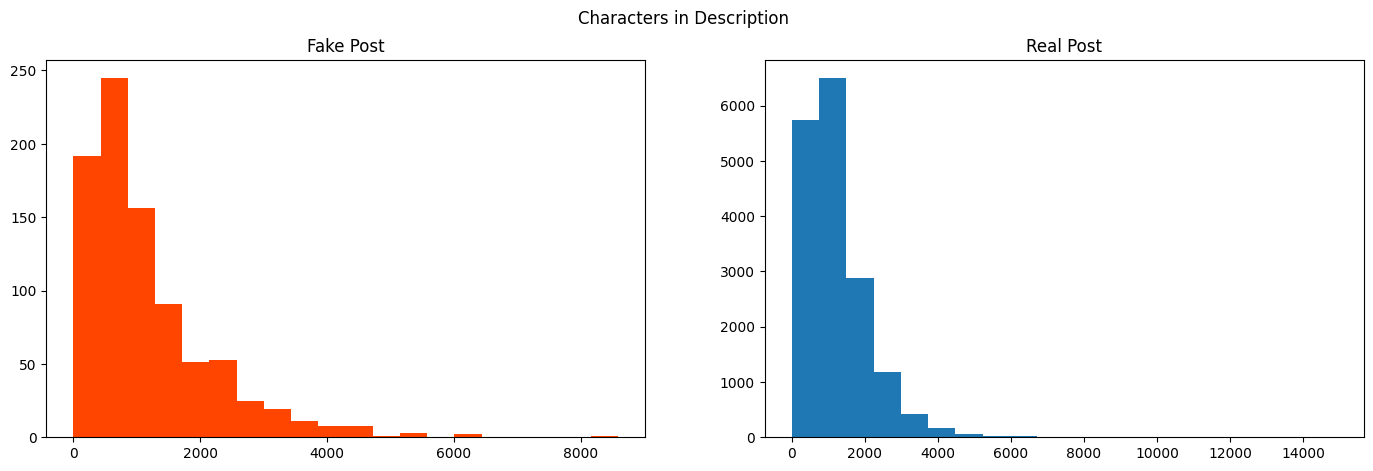

In [15]:
#Description

fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)

#counting the number of characters for frauduelent data
length=ddata[ddata["fraudulent"]==1]['description'].str.len()

#plotting the histogram
ax1.hist(length,bins = 20,color='orangered')
ax1.set_title('Fake Post')

#counting the number of characters for Non frauduelent data
length=ddata[ddata["fraudulent"]==0]['description'].str.len()

#plotting the histogram
ax2.hist(length, bins = 20)
ax2.set_title('Real Post')
fig.suptitle('Characters in Description')
plt.show()

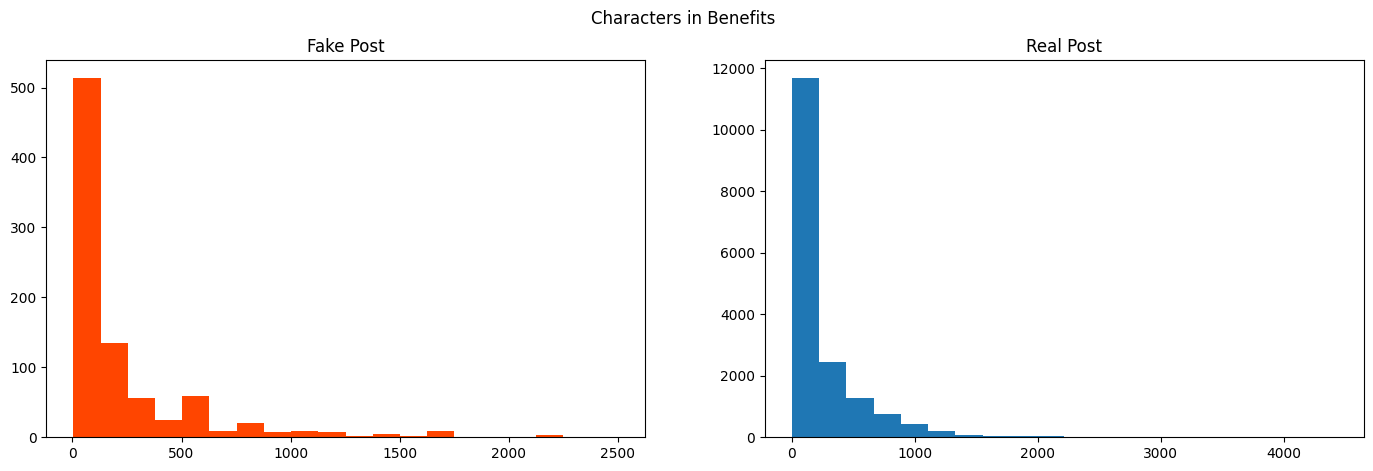

In [16]:
#Benefits

fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(17, 5), dpi=100)

#counting the number of characters for frauduelent data
length=ddata[ddata["fraudulent"]==1]['benefits'].str.len()

#plotting the histogram
ax1.hist(length,bins = 20,color='orangered')
ax1.set_title('Fake Post')

#counting the number of characters for Non frauduelent data
length=ddata[ddata["fraudulent"]==0]['benefits'].str.len()

#plotting the histogram
ax2.hist(length, bins = 20)
ax2.set_title('Real Post')
fig.suptitle('Characters in Benefits')
plt.show()

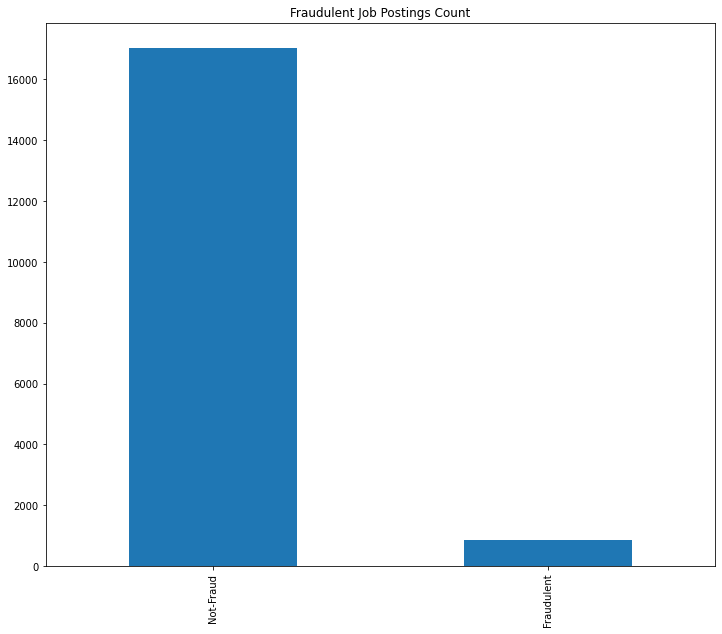

In [17]:
#Fraudulent Job Postings

ddata['fraudulent'] = np.where(ddata['fraudulent']==0, 'Not-Fraud', 'Fraudulent')

ddata['fraudulent'].value_counts().plot(kind='bar', title='Fraudulent Job Postings Count', figsize=(12,10))

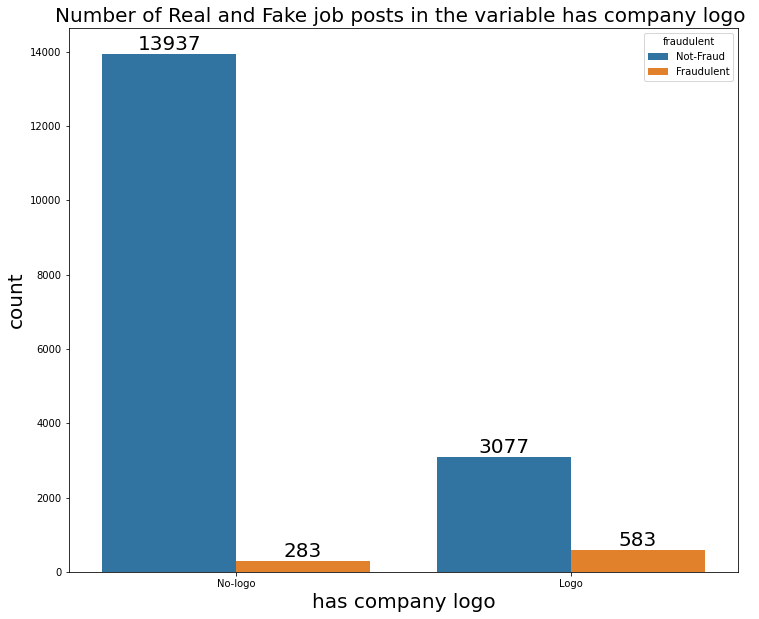

In [18]:
ddata['has_company_logo'] = np.where(ddata['has_company_logo']==0, "Logo", "No-logo")

plt.figure(figsize=(12,10))
ax=sns.countplot(x ="has_company_logo", hue="fraudulent", data=ddata)

#setting the title and fontsize of the x and y axis label of the count plot
ax.set_title("Number of Real and Fake job posts in the variable has company logo ", fontsize = 20)
plt.xlabel("has company logo",fontsize=20)
plt.ylabel("count", fontsize=20)

#To Display the count values on top of the countplot
for p in ax.patches:
  ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='bottom', color='black', size=20)

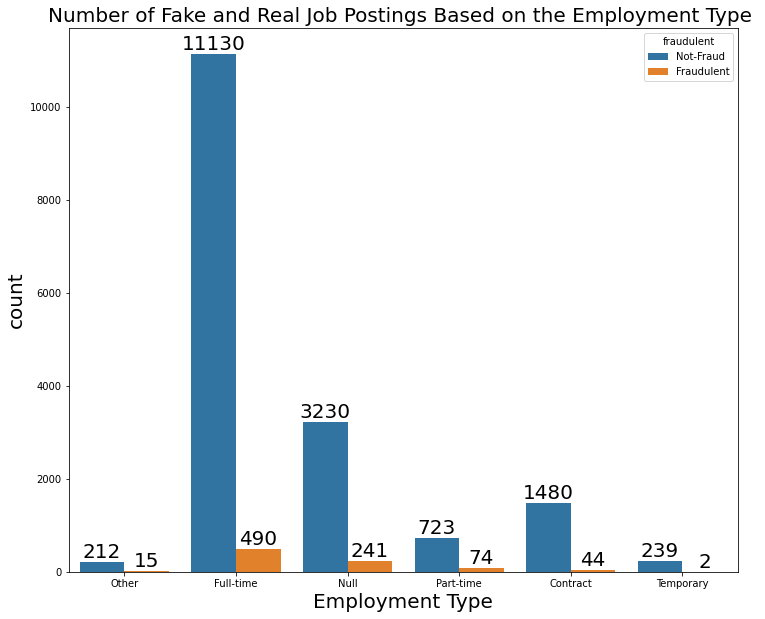

In [19]:
plt.figure(figsize=(12,10))
ax=sns.countplot(x ="employment_type", hue="fraudulent", data=ddata)

#setting the title and fontsize of the x and y axis label of the count plot
ax.set_title("Number of Fake and Real Job Postings Based on the Employment Type ", fontsize = 20)
plt.xlabel("Employment Type",fontsize=20)
plt.ylabel("count", fontsize=20)

#To Display the count values on top of the countplot
for p in ax.patches:
  ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='bottom', color='black', size=20)

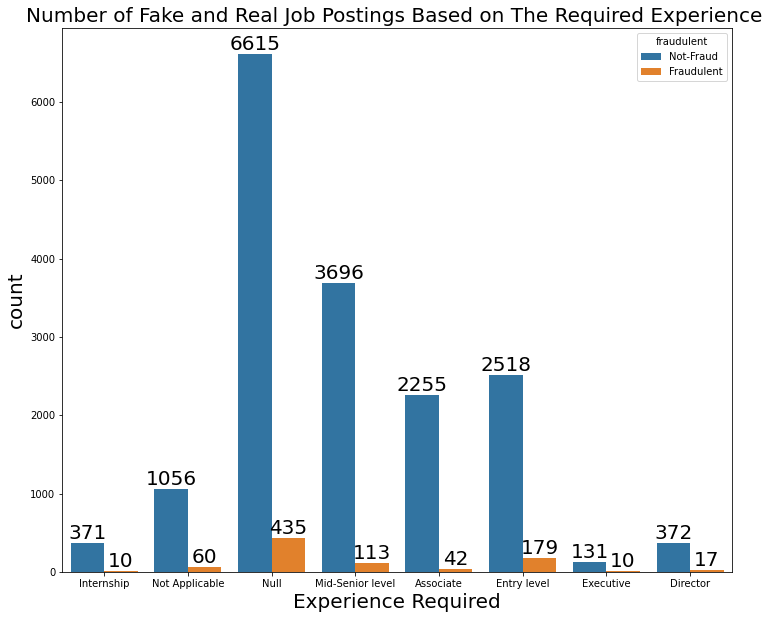

In [20]:
plt.figure(figsize=(12,10))
ax=sns.countplot(x ="required_experience", hue="fraudulent", data=ddata)

#setting the title and fontsize of the x and y axis label of the count plot
ax.set_title("Number of Fake and Real Job Postings Based on The Required Experience ", fontsize = 20)
plt.xlabel("Experience Required",fontsize=20)
plt.ylabel("count", fontsize=20)

#To Display the count values on top of the countplot
for p in ax.patches:
  ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='bottom', color='black', size=20)

From the above, you can see that a job posting is most likely to fraudulent when the experience required  is not stated than when it is. There seem to be more fraudulent postings for Mid-senior  and associate levels than there is for internships, executive and director levels. 


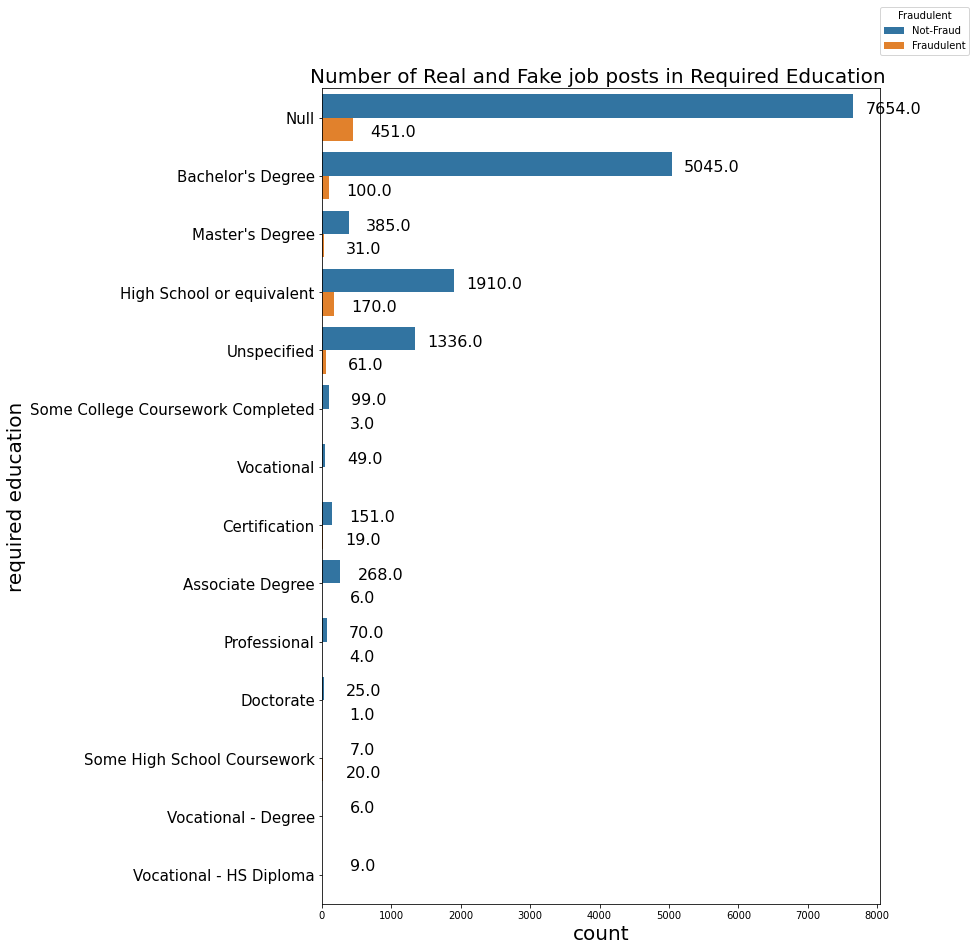

In [21]:
#Required education

plt.figure(figsize=(10,15))
ax=sns.countplot(y ="required_education", hue="fraudulent", data=ddata)

#setting the title and fontsize of the x and y axis label of the count plot
ax.set_title("Number of Real and Fake job posts in Required Education ", fontsize = 20)
plt.xlabel("count",fontsize=20)
plt.ylabel("required education", fontsize=20)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1, 1.1),title='Fraudulent', loc=2, borderaxespad=0.)


#setting the font size for the Y axis elements 
ax.set_yticklabels(ax.get_yticklabels(),  fontsize=15)

#To Display the count values on top of the countplot
for p in ax.patches:
    width = p.get_width()
    x, y = p.get_xy()
    ax.annotate(float(width),
                ((x + width), y), 
                xytext = (40, -15),
                fontsize = 16,
                color = '#000000',
                textcoords = 'offset points',
                ha = 'center',
                va = 'center')
    

plt.show()

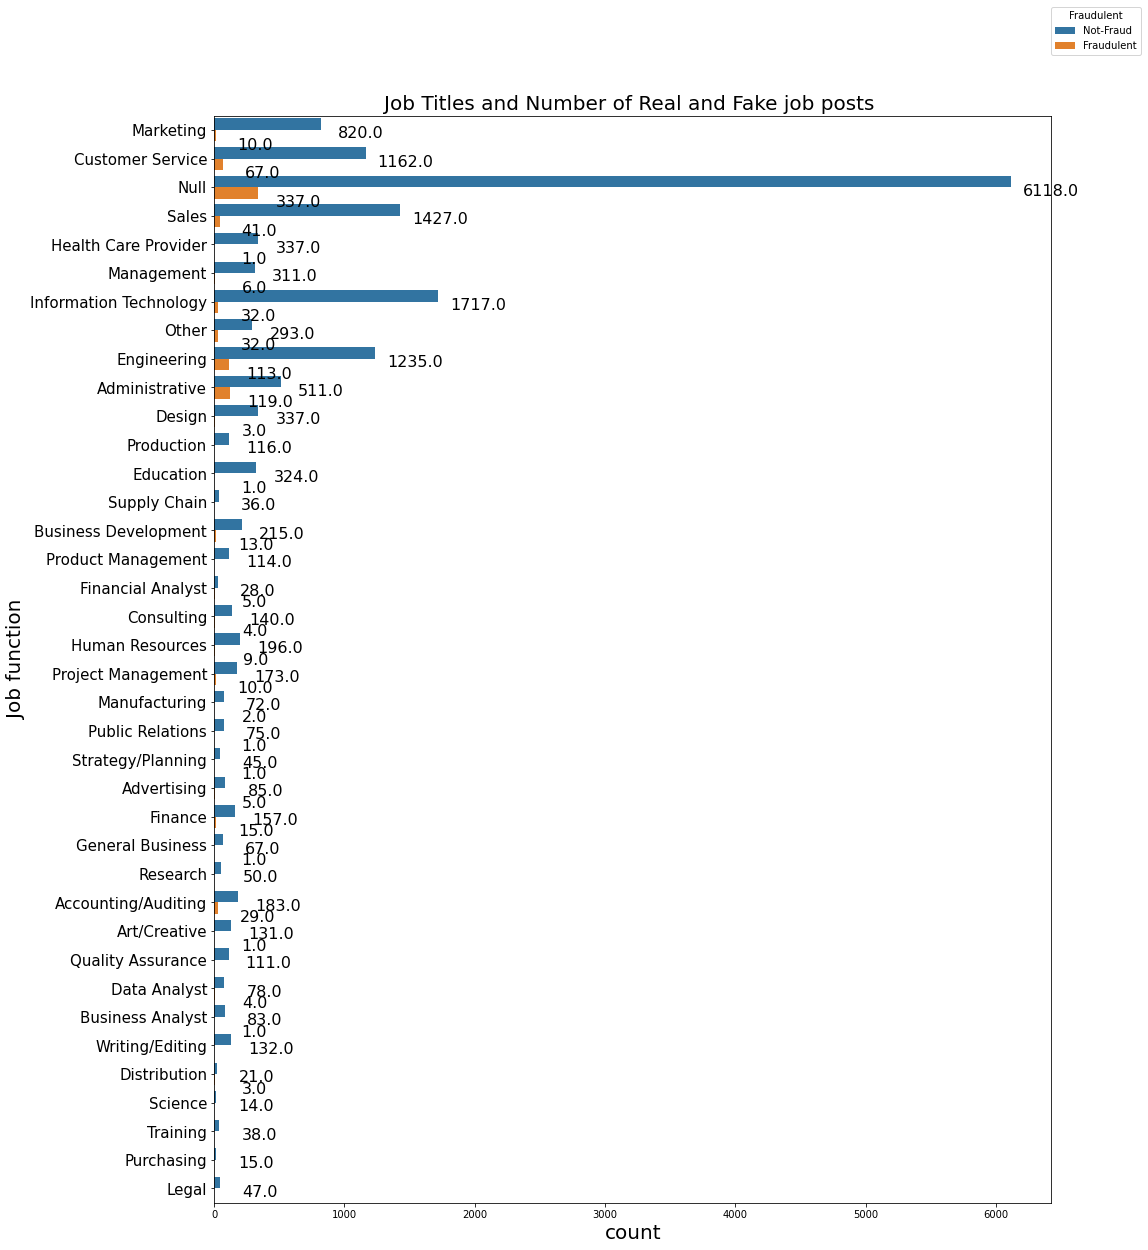

In [22]:
plt.figure(figsize=(15,20))
ax=sns.countplot(y ="function", hue="fraudulent", data=ddata)

#setting the title and fontsize of the x and y axis label of the count plot
ax.set_title("Job Titles and Number of Real and Fake job posts ", fontsize = 20)
plt.xlabel("count",fontsize=20)
plt.ylabel("Job function", fontsize=20)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1, 1.1),title='Fraudulent', loc=2, borderaxespad=0.)


#setting the font size for the Y axis elements 
ax.set_yticklabels(ax.get_yticklabels(),  fontsize=15)

#To Display the count values on top of the countplot
for p in ax.patches:
    width = p.get_width()
    x, y = p.get_xy()
    ax.annotate(float(width),
                ((x + width), y), 
                xytext = (40, -15),
                fontsize = 16,
                color = '#000000',
                textcoords = 'offset points',
                ha = 'center',
                va = 'center')
    

plt.show()

Finally, to find out the industries with highest fake job postings, we will extract fake job postings. 

In [23]:
fake_job_postings = ddata[ddata['fraudulent']=='Fraudulent']


#Extract Top 10 indutries with highest fake postings
top_industries = fake_job_postings['industry'].value_counts().head(10)

print("The Indutries with the highest job posting are:\n")
print(top_industries)

The Indutries with the highest job posting are:

Null                                   275
Oil & Energy                           109
Accounting                              57
Hospital & Health Care                  51
Marketing and Advertising               45
Financial Services                      35
Information Technology and Services     32
Telecommunications                      26
Consumer Services                       24
Real Estate                             24
Name: industry, dtype: int64


##In conclusion:
>Oil & Gas industry has the highest number of fake job postings followed by accounting, hospital & healthcare, marketing & advertising, and financial services industry respectively. Administrative, engineering, customer service, sales and accounting & auditing positions are mostly likely to have fake job postings compared to other job positions. 